In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib notebook

In [3]:
xraypath = '/Users/olgaridzel/Research/optical-data-fit/sf/'

In [14]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = 0.087
dna_drude.electron_density = 0.2921
dna_drude.static_refractive_index = 1.48
dna_drude.Z = 4.85

<IPython.core.display.Javascript object>


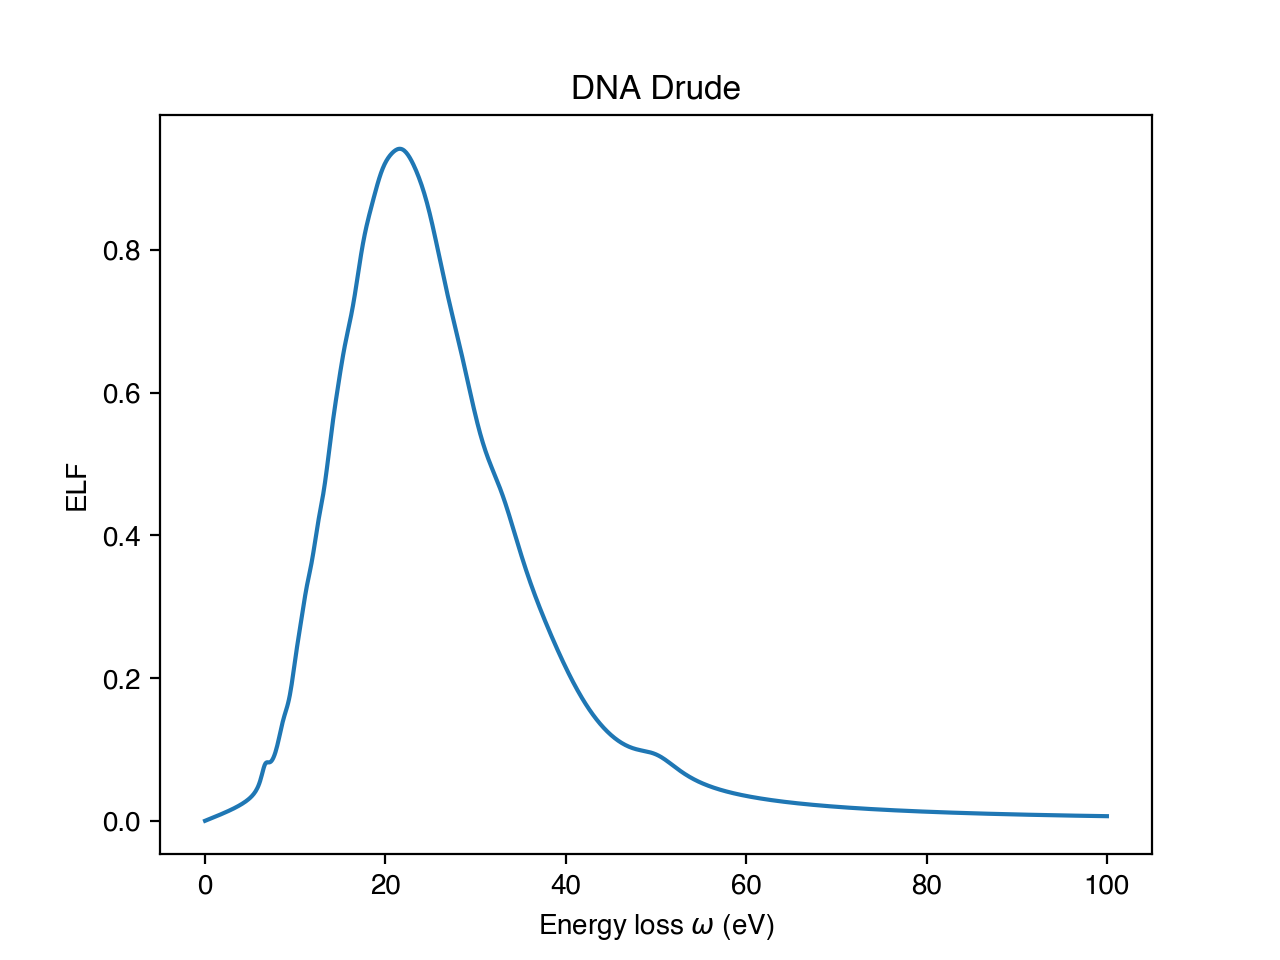

In [15]:
dna_drude.plotELF()

In [16]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [17]:
opt_ = opt.OptFit(dna_drude, x_exp, y_exp, 1600)

In [18]:
result = opt_.runOptimisation('ndiimfp')

In [20]:
oscOptimised = opt_.vec2Struct(result)

In [21]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [ 2.74033868 29.69367683 24.39880512  4.26797643 29.38245633 17.46416965
 27.49973495 21.94811684 22.42193662 21.46139768 19.67949965 24.63419642
 28.00790954 18.53716456 58.76522754 13.57926942 32.5588696   5.73366418]
Gamma: [ 1.13236874  1.88943786  1.82956672  1.73900723  2.50968521  2.09630317
  2.84441007  3.65097638  3.83693754  5.11031792  5.971554   15.16652001
  8.29145508  7.06290584 69.27539215  6.94819124 13.624046    7.11474349]
Omega: [ 6.51428579  8.67022354  9.83279399 10.2596801  10.97390645 12.07495361
 13.44464502 14.99949068 16.66339793 18.66935688 20.86912841 22.75353193
 23.56234174 27.64315198 30.46562008 32.38321624 37.00750257 50.40118483]


<IPython.core.display.Javascript object>


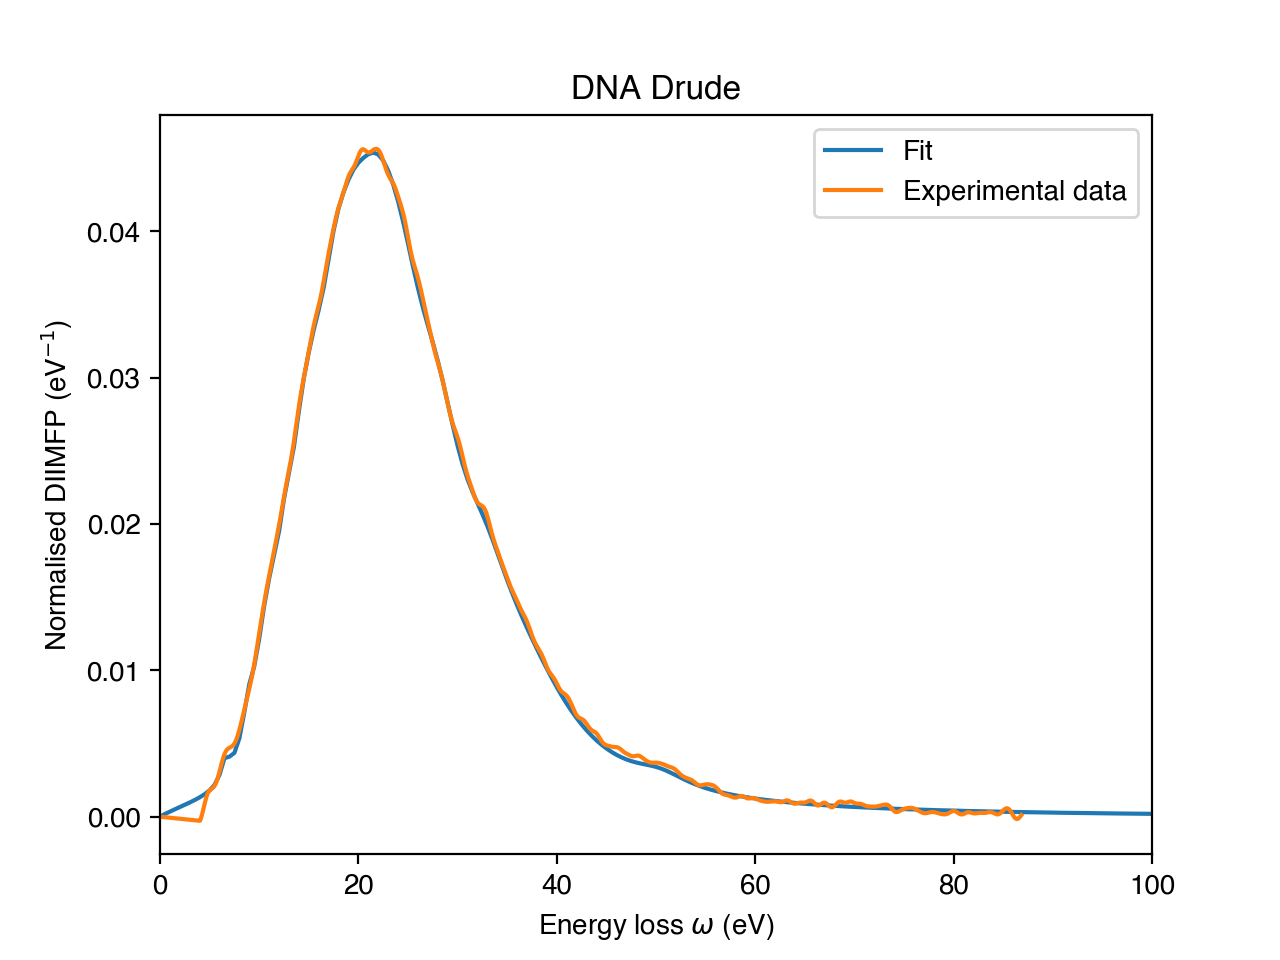

In [22]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [24]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.760486067064939
Z = 4.85
KKSum = 1.0983975427180646


<IPython.core.display.Javascript object>


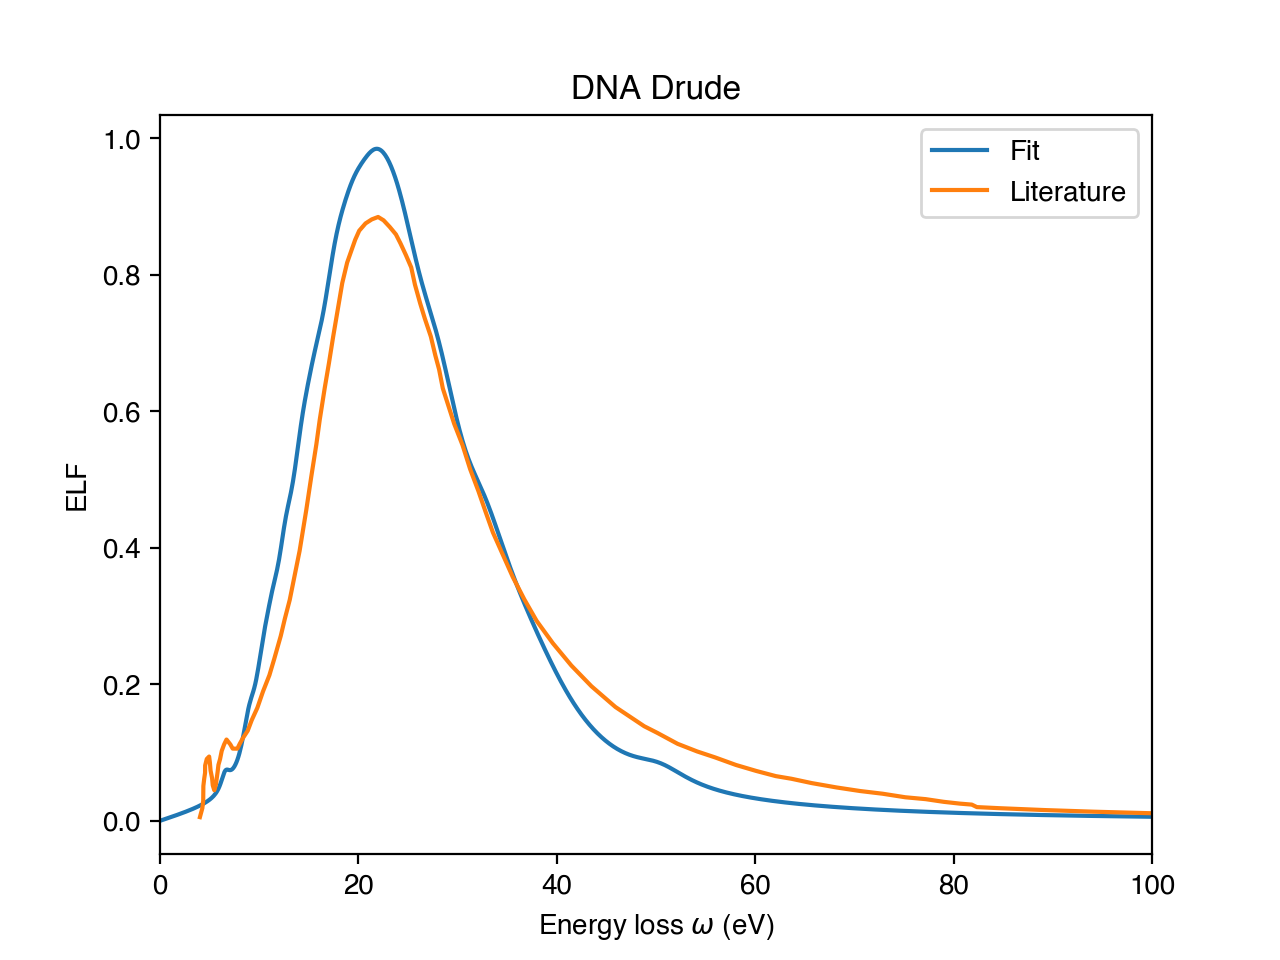

In [26]:
fd = pd.read_csv('../../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values
oscOptimised.calculateELF()

plt.figure()
plt.plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
plt.plot(exp_elf[:,0],exp_elf[:,3],label='Literature')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

In [66]:
A =     [210,  50.0, 10]
gamma = [0.53, 25.2, 10]
omega = [3.04, 14.0, 20]

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 1)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

M = 26.9815386 # Molar weight
rho = 2.6989 # g/cm3
N_Avogadro = 6.02217e23 

al_dl = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_dl.Ef = 11.36
al_dl.atomic_density = rho * N_Avogadro / M *1e-24
al_dl.static_refractive_index = 1.15
al_dl.electron_density = 0.2249
al_dl.omega_pl = np.sqrt(4*math.pi*al_dl.electron_density*opt.a0**3) * opt.h2ev
al_dl.Z = 13

In [67]:
fsum = al_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(al_dl.Z))

kksum = al_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 12.505919563230814
Z = 13
KKSum = 1.7353411281899866


In [ ]:
opt_ = opt.OptFit(al_dl, x_exp, y_exp, 700)

In [ ]:
result = opt_.runOptimisation()

In [ ]:
oscOptimised = opt_.vec2Struct(result)

In [ ]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

In [ ]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [47]:
al_dl.calculateELF()

<IPython.core.display.Javascript object>


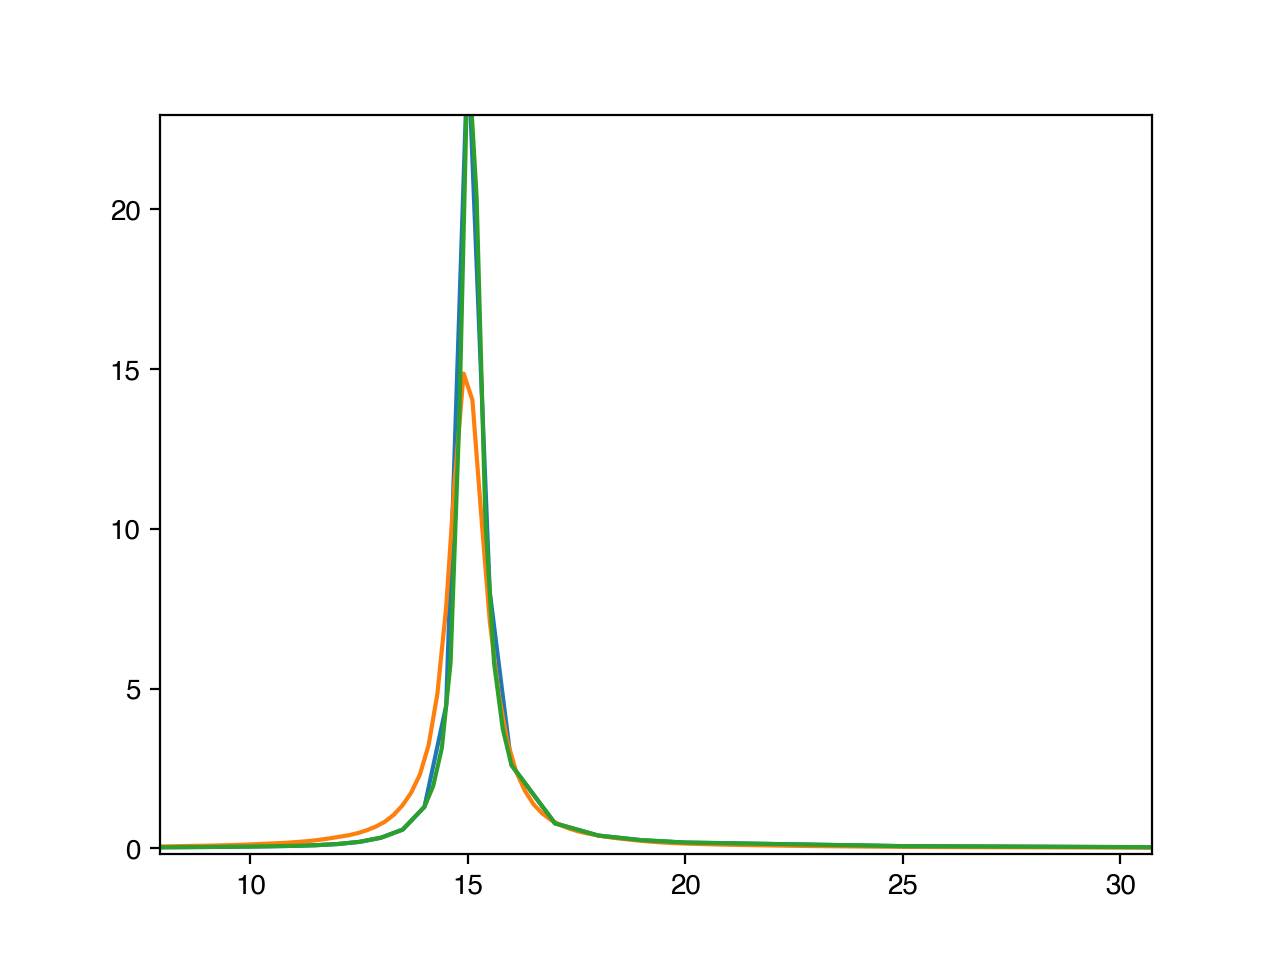

In [60]:
plt.figure()
# plt.plot(al_dl.eloss_extended_to_Henke, al_dl.ELF_extended_to_Henke)
plt.plot(energy, elf)
plt.plot(al[:,0], al[:,1])
plt.plot(al_diel[:,0], al_diel[:,3])
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [61]:
energy = opt.linspace(0, 1000, 0.1)
elf = np.interp(energy, al_dl.eloss_extended_to_Henke, al_dl.ELF_extended_to_Henke)

In [19]:
energy

array([2.22044605e-16, 5.00000000e-01, 1.00000000e+00, ...,
       9.99000000e+02, 9.99500000e+02, 1.00000000e+03])

In [65]:
np.savetxt('elf.in', np.c_[energy, elf], delimiter=' ', newline='\n') 

In [27]:
al = np.loadtxt('/Users/olgaridzel/Research/MAST-SEY/examples/Al/Al_SPA/elf.in')

In [54]:
al_diel = np.loadtxt('/Users/olgaridzel/Downloads/al.diel')

In [56]:
energy = opt.linspace(0, 1000, 0.5)
elf = np.interp(energy, al_diel[:,0], al_diel[:,3])

In [57]:
np.savetxt('elf.in', (energy, elf), delimiter=' ', newline='\n', fmt='%1.4e') 

In [59]:
elf

array([1.53147333e-05, 3.56676541e-04, 1.22815020e-03, ...,
       6.34128894e-05, 6.32942842e-05, 6.31756791e-05])